
# 1. Summary
We've collected data of songs which were present on spotify in 2010-2019, in the
USA. The data comprises several predictors such as instrumentalness and loudness,
as well as other song descriptors. We attempt to predict whether a song
would be a hit or a flop according to spotify's own classification method.
We create and tune 4 classifier models, the logistic regression, the random 
forest, the svm method, and the forward propagated neural network.
What we find is that a random forest classifier outperforms the other model,
with instrumentalness being a dominant predictor, with the next few predictors
remaining important, yet significantly less so. Those being energy, danceability,
loudness, acousticness, valence, and duration.

# 2. Introduction

In recent years, music streaming services have become increasingly popular, with Spotify being one of the most popular platforms. With its vast collection of songs and user-friendly interface, Spotify has become a go-to destination for music lovers across the globe. However, for the music industry, understanding what makes a song popular or not is essential. For our final project, we aim to find the most optimal classification model to predict whether a song is a hit or a flop, based on its characteristics obtained from the Spotify dataset. The following are the features,

### *2.1 Features*

-   track: The Name of the track.
-   artist: The Name of the Artist.
-   uri: The resource identifier for the track.
-   danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
-   energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
-   key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
-   loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
-   mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
-   speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
-   acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
-   instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
-   liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
-   valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
-   tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
-   duration_ms: The duration of the track in milliseconds.
-   time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
-   chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
-   sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
-   target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

### *2.2 Hit Criteria*

The author's condition of a track being 'flop' is as follows:

  - The track must not appear in the 'hit' list of that decade.
  - The track's artist must not appear in the 'hit' list of that decade.
  - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
  - The track's genre must not have a song in the 'hit' list.
  - The track must have 'US' as one of its markets.


The Spotify dataset we use in this report contains various features for each song, such as the tempo, key, duration, danceability, and energy level. We will use these features to build a classification model that can accurately predict whether a song will be a hit or a flop. To build this model, we will first explore the dataset.


# 3. EDA


### *3.1 Importing important libraries*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Data Source: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset?resource=download

In [3]:
df = pd.read_csv("dataset-of-10s.csv")

In [4]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


### *3.2 Data Checks to perform*
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

We know that many of the features above like key, mode are categorical variables. We can see that by checking the unique values. We will address this by changing them to type object. But first we have some discrepencies in the data. We have 6398 rows but we have only 6378 unique URI values.

In [8]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [9]:
df.nunique()

track               5966
artist              3355
uri                 6378
danceability         882
energy              1066
key                   12
loudness            4704
mode                   2
speechiness         1114
acousticness        2668
instrumentalness    2302
liveness            1206
valence             1219
tempo               5531
duration_ms         5591
time_signature         5
chorus_hit          6241
sections              40
target                 2
dtype: int64

In [10]:
df1 = df["uri"]
df[df1.duplicated()]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
1029,BAD!,XXXTENTACION,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.799,0.526,8,-5.153,1,0.0717,0.334000,0.001740,0.0571,0.746,129.875,150475,4,30.24642,7,1
1187,Suge,DaBaby,spotify:track:2gwkD6igEhQbDQegRCcdoB,0.876,0.662,2,-6.482,0,0.4260,0.060800,0.000000,0.1270,0.844,75.445,163320,4,22.72264,9,1
1624,Bandz A Make Her Dance (feat. Lil' Wayne & 2 C...,Juicy J,spotify:track:7EZPH9Px3gXlxD5KJDwtwc,0.871,0.743,2,-5.442,1,0.2770,0.002120,0.000000,0.1410,0.576,130.977,278827,4,46.23262,16,0
1634,Adore,Cashmere Cat Featuring Ariana Grande,spotify:track:34HwOOG2tTiz6tAN9h83YT,0.334,0.622,5,-5.611,0,0.0632,0.082600,0.000013,0.1060,0.209,139.546,216000,4,55.50734,10,1
2107,Don't,Ed Sheeran,spotify:track:3HVWdVOQ0ZA45FuZGSfvns,0.798,0.675,6,-5.041,1,0.0442,0.091200,0.000000,0.0894,0.842,101.956,219947,4,18.72527,11,1
2508,Bounce It (feat. Wale & Trey Songz),Juicy J,spotify:track:3N5oiETJEStSB71TjTFkWV,0.785,0.572,11,-9.383,1,0.0859,0.008110,0.000000,0.1110,0.477,140.032,260560,4,27.07503,13,0
2996,Sure Thing,Miguel,spotify:track:0JXXNGljqupsJaZsgSbMZV,0.684,0.603,11,-8.127,0,0.0989,0.027500,0.000311,0.1910,0.504,81.000,195373,4,26.39306,10,1
3168,Shell Shocked,"Juicy J, Wiz Khalifa & Ty Dolla $ign Featuring...",spotify:track:7zBQRGpYImAdIZc97FNj3V,0.596,0.815,6,-5.668,0,0.0755,0.011100,0.000000,0.1740,0.459,165.015,206567,4,61.99116,9,1
3312,Culture,Migos Featuring DJ Khaled,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,0.927,0.665,11,-5.313,1,0.2440,0.061000,0.000000,0.1230,0.175,127.076,343150,4,47.37726,18,1
3446,Ready,Fabolous Featuring Chris Brown,spotify:track:2fQ6sBFWaLv2Gxos4igHLy,0.724,0.870,1,-3.614,0,0.1130,0.004530,0.000000,0.8330,0.810,93.010,207547,4,31.87471,13,1


In [11]:
df[df["uri"] == "spotify:track:7EZPH9Px3gXlxD5KJDwtwc"]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
898,Bandz A Make Her Dance,Juicy J Featuring Lil Wayne & 2 Chainz,spotify:track:7EZPH9Px3gXlxD5KJDwtwc,0.871,0.743,2,-5.442,1,0.277,0.00212,0.0,0.141,0.576,130.977,278827,4,46.23262,16,1
1624,Bandz A Make Her Dance (feat. Lil' Wayne & 2 C...,Juicy J,spotify:track:7EZPH9Px3gXlxD5KJDwtwc,0.871,0.743,2,-5.442,1,0.277,0.00212,0.0,0.141,0.576,130.977,278827,4,46.23262,16,0


Very interesting to see that for a track with the only difference being the addition of "(feat. Wale & Trey Songz)", we have two different outputs. One having target = 1 and other having target = 0. 

One very possible reason could be that even though both songs are the exact same, spotify will have two records on the app for the users, and one of them was played way more than the other. 

To tackle this issue, I will attempt to remove both the instances of these "duplicated URIs"

In [12]:
to_remove_uri = list(df[df1.duplicated()].uri)
removed_df = df[df["uri"].isin(to_remove_uri)]


In [13]:
removed_df.sort_values(by="track")

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
5955,0 To 100 / The Catch Up,Drake,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,0.559,0.716,11,-3.964,0,0.3900,0.737000,0.000000,0.2520,0.504,176.618,275227,4,22.04710,14,1
1359,100,The Game Featuring Drake,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,0.559,0.716,11,-3.964,0,0.3900,0.737000,0.000000,0.2520,0.504,176.618,275227,4,22.04710,14,1
1634,Adore,Cashmere Cat Featuring Ariana Grande,spotify:track:34HwOOG2tTiz6tAN9h83YT,0.334,0.622,5,-5.611,0,0.0632,0.082600,0.000013,0.1060,0.209,139.546,216000,4,55.50734,10,1
438,Adore,Cashmere Cat,spotify:track:34HwOOG2tTiz6tAN9h83YT,0.334,0.622,5,-5.611,0,0.0632,0.082600,0.000013,0.1060,0.209,139.546,216000,4,55.50734,10,0
2823,All I Want Is You,Miguel Featuring J. Cole,spotify:track:0JXXNGljqupsJaZsgSbMZV,0.684,0.603,11,-8.127,0,0.0989,0.027500,0.000311,0.1910,0.504,81.000,195373,4,26.39306,10,1
1029,BAD!,XXXTENTACION,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.799,0.526,8,-5.153,1,0.0717,0.334000,0.001740,0.0571,0.746,129.875,150475,4,30.24642,7,1
473,Baby,Lil Baby & DaBaby,spotify:track:2gwkD6igEhQbDQegRCcdoB,0.876,0.662,2,-6.482,0,0.4260,0.060800,0.000000,0.1270,0.844,75.445,163320,4,22.72264,9,1
226,Bad And Boujee,Migos Featuring Lil Uzi Vert,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,0.927,0.665,11,-5.313,1,0.2440,0.061000,0.000000,0.1230,0.175,127.076,343150,4,47.37726,18,1
5127,Bad Bad Bad,Young Thug Featuring Lil Baby,spotify:track:1GeNui6m825V8jP4uKiIaH,0.974,0.596,6,-8.888,1,0.1840,0.097600,0.000000,0.1510,0.892,111.959,149040,4,32.73631,8,1
525,Bad Vibes Forever,XXXTENTACION Featuring PnB Rock & Trippie Redd,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.799,0.526,8,-5.153,1,0.0717,0.334000,0.001740,0.0571,0.746,129.875,150475,4,30.24642,7,1


In [14]:
df = df[~df["uri"].isin(to_remove_uri)]
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0


 Making the categorical switch for some of the features


In [15]:
df["mode"] = df["mode"].astype('O')
df["time_signature"] = df["time_signature"].astype('O')
df["key"] = df["key"].astype('O')
df["target"] = df["target"].astype('O')
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature       object
chorus_hit          float64
sections              int64
target               object
dtype: object

### *3.3 Visualizations*

<AxesSubplot:>

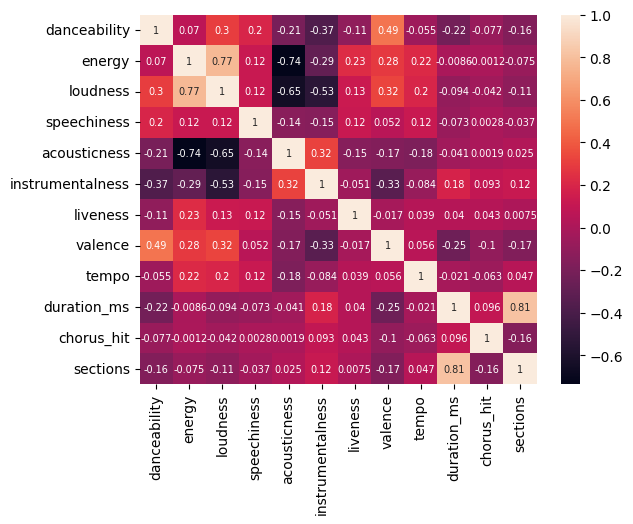

In [16]:
sns.heatmap(df.corr(), annot_kws={"size": "7"}, annot=True )

The analysis indicates that most of the features are not correlated. However, a strong negative correlation
is observed between Energy and Acousticness, indicating that a song with high ‘Acousticness’ tends to have
low ‘Energy.’ Similarly, Loudness and Acousticness also exhibit a negative correlation. On the other hand,
a significant positive correlation is found between Energy and Loudness, suggesting that as the ‘Energy’ of
a song increases, so does the ‘Loudness.’ Despite the high correlation scores, we will retain all features for
the model building process as they may contain valuable information.
Next we see how the (numerical and categorical) features are distributed in context of the response variable,
target which indicates a hit/flop.

In [ ]:
for column in df.select_dtypes(include=['number']):
    plt.figure()
    sns.histplot(data=df,x=column, bins=10, edgecolor='k', hue = "target")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

No such clear distinctions in the data based on these numerical features.

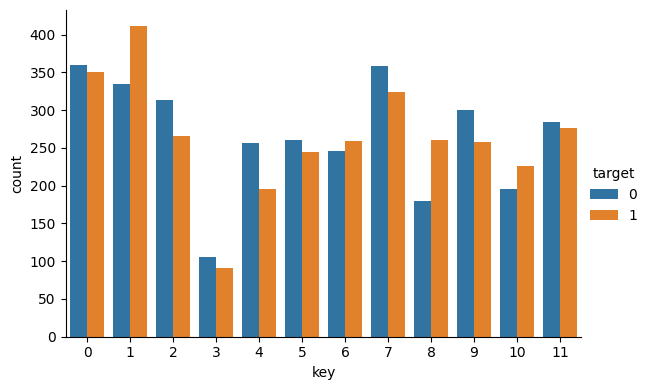

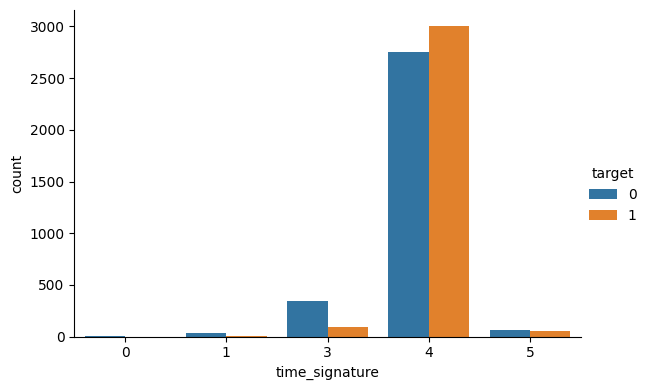

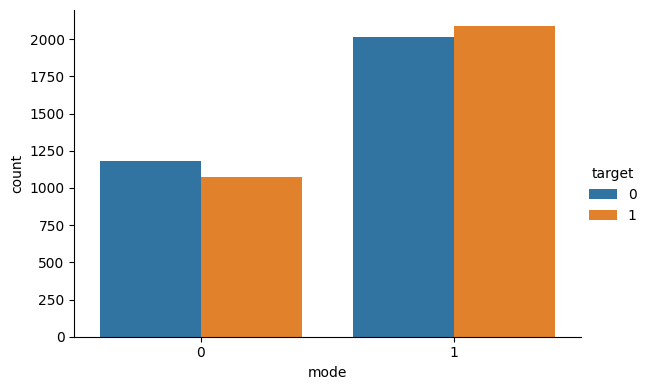

In [25]:
for column in ["key", "time_signature", "mode"]:
    
    g = sns.catplot(data=df, kind="count", x=column, hue="target", height=4, aspect=1.5)

# Show the plot
plt.show()

Though we do not see clear distinctions of Hit/Flop in the distributions of the features, some general trends
are visible. We see that there are more Flops than there are Hits. Features like Instrumentalness and
time_signature are standing out since most of the data points are concentrated at one value. For every
“major” song, there are twice as many “minor” songs. Similarly, for every “major” Hit, there are twice as
many “minor” Hits

In [29]:
df.to_csv("dataset-of-10s-CLEANED.csv", index=False)